To start, I modified the dataset to chnage the class data type from object (a list of names) to numeric. The following describes the values: 

0 = ae-aegypti-female
1 = ae-aegypti-male
2 = ae-albopictus-female
3 = ae-albopictus-male 
4 = cx-quinq-female
5 = cx-quinq-male

Load modified dataset

In [40]:
import pandas as pd
from scipy.io import arff

path = 'datasets/INSECTS-abrupt_balanced_norm_mod.arff'
data, meta = arff.loadarff(path)

Building the data stream and defining convenience methods

In [41]:
from skmultiflow.data import DataStream
import numpy

dataStream = DataStream(data=data, target_idx=33, n_targets=1)

def buildWindow():
    x = []
    y = []
    for index in range(0, 1000):
        sample_x, sample_y = dataStream.next_sample()
        x.append(sample_x)
        y.append(sample_y)
    return x, y

def updateWindow(x: list[float], y: list[float], new_x, new_y):
    x.pop(0)
    x.append(new_x)
    
    y.pop(0)
    y.append(new_y)
    
    return x, y

In [42]:
def runNoChange():

    window = buildWindow()
    X_train = window[0]
    Y_train = window[1]
    n_samples = 0
    correct_count = 0
    accuracy = []
    time = []
    previous_prediction = Y_train[len(Y_train) - 1]

    while (dataStream.has_more_samples()):
        new_x, new_y = dataStream.next_sample()
        n_samples += 1
        
        y = previous_prediction

        if new_y == y:
            correct_count += 1
                
        accuracy.append(correct_count / n_samples)

        time.append(n_samples)

        previous_prediction = new_y
    
    dataStream.restart()
    return time, accuracy

In [43]:
def runMajorityClass():
    from sklearn.dummy import DummyClassifier
    window = buildWindow()
    X_train = window[0]
    Y_train = window[1]

    majority_cls = DummyClassifier(strategy='most_frequent')
    majority_cls.fit(X_train, Y_train)

    n_samples = 0
    correct_count = 0
    accuracy = []
    time = []

    while (dataStream.has_more_samples()):
        new_x, new_y = dataStream.next_sample()
        n_samples += 1
        
        y = majority_cls.predict(new_x)

        if new_y == y:
            correct_count += 1
                
        accuracy.append(correct_count / n_samples)

        time.append(n_samples)

        X_train, Y_train = updateWindow(X_train, Y_train, new_x, new_y)
        majority_cls.fit(X_train, Y_train)

    dataStream.restart()
    return time, accuracy


In [44]:
def runHoeffdingTreeClassifier():
    from skmultiflow.trees import HoeffdingTreeClassifier

    window = dataStream.next_sample(batch_size=1000)
    X_train = window[0]
    Y_train = window[1]

    ht = HoeffdingTreeClassifier()
    ht.partial_fit(X_train, Y_train)

    n_samples = 0
    correct_count = 0
    accuracy = []
    time = []

    while (dataStream.has_more_samples()):
        new_x, new_y = dataStream.next_sample()
        n_samples += 1
        
        y = ht.predict(new_x)

        if new_y == y:
            correct_count += 1
                
        accuracy.append(correct_count / n_samples)

        time.append(n_samples)
        ht.partial_fit(new_x, new_y)
    
    dataStream.restart()
    return time, accuracy

In [45]:
def runHoeffdingAdaptiveTreeClassifier():
    from skmultiflow.trees import HoeffdingAdaptiveTreeClassifier

    window = dataStream.next_sample(batch_size=1000)
    X_train = window[0]
    Y_train = window[1]

    ht = HoeffdingAdaptiveTreeClassifier()
    ht.partial_fit(X_train, Y_train)

    n_samples = 0
    correct_count = 0
    accuracy = []
    time = []

    while (dataStream.has_more_samples()):
        new_x, new_y = dataStream.next_sample()
        n_samples += 1
        
        y = ht.predict(new_x)

        if new_y == y:
            correct_count += 1
                
        accuracy.append(correct_count / n_samples)

        time.append(n_samples)
        ht.partial_fit(new_x, new_y)
    
    dataStream.restart()
    return time, accuracy

In [46]:
def runSAMKNNClassifier():
    from skmultiflow.lazy import SAMKNNClassifier

    window = dataStream.next_sample(batch_size=1000)
    X_train = window[0]
    Y_train = window[1]

    ht = SAMKNNClassifier()
    ht.partial_fit(X_train, Y_train)

    n_samples = 0
    correct_count = 0
    accuracy = []
    time = []

    while (dataStream.has_more_samples()):
        new_x, new_y = dataStream.next_sample()
        n_samples += 1
        
        y = ht.predict(new_x)

        if new_y == y:
            correct_count += 1
                
        accuracy.append(correct_count / n_samples)

        time.append(n_samples)
        ht.partial_fit(new_x, new_y)
    
    dataStream.restart()
    return time, accuracy

In [47]:
def runBatchIncrementalClassifier():
    from skmultiflow.meta import BatchIncrementalClassifier

    window = dataStream.next_sample(batch_size=1000)
    X_train = window[0]
    Y_train = window[1]

    ht = BatchIncrementalClassifier()
    ht.partial_fit(X_train, Y_train)

    n_samples = 0
    correct_count = 0
    accuracy = []
    time = []

    while (dataStream.has_more_samples()):
        new_x, new_y = dataStream.next_sample()
        n_samples += 1
        
        y = ht.predict(new_x)

        if new_y == y:
            correct_count += 1
                
        accuracy.append(correct_count / n_samples)

        time.append(n_samples)
        ht.partial_fit(new_x, new_y)
    
    dataStream.restart()
    return time, accuracy

In [48]:
def runAdaptiveRandomForestClassifier():
    from skmultiflow.meta import AdaptiveRandomForestClassifier

    window = dataStream.next_sample(batch_size=1000)
    X_train = window[0]
    Y_train = window[1]

    ht = AdaptiveRandomForestClassifier()
    ht.partial_fit(X_train, Y_train)

    n_samples = 0
    correct_count = 0
    accuracy = []
    time = []

    while (dataStream.has_more_samples()):
        new_x, new_y = dataStream.next_sample()
        n_samples += 1
        
        y = ht.predict(new_x)

        if new_y == y:
            correct_count += 1
                
        accuracy.append(correct_count / n_samples)

        time.append(n_samples)
        ht.partial_fit(new_x, new_y)
    
    dataStream.restart()
    return time, accuracy

In [49]:
no_change = runNoChange()
majority_cls = runMajorityClass()
hoeffding_tree = runHoeffdingTreeClassifier()
hoeffding_adaptive = runHoeffdingAdaptiveTreeClassifier()
SAM_KNN = runSAMKNNClassifier()
batch_incremental = runBatchIncrementalClassifier()
adaptive_random = runAdaptiveRandomForestClassifier()

Ploting the accuracy

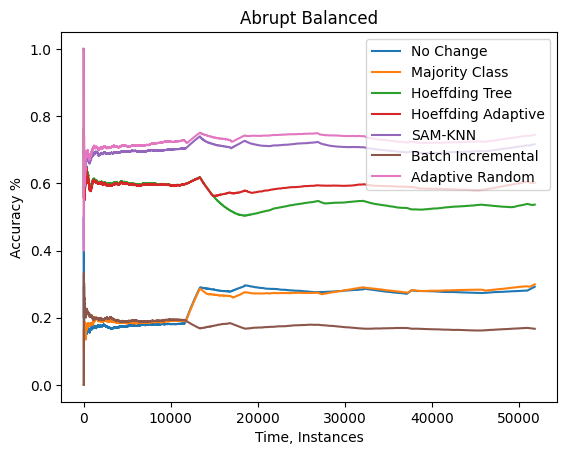

In [50]:
import matplotlib.pyplot as plot

accuracy_plot = plot
accuracy_plot.xlabel('Time, Instances')
accuracy_plot.ylabel('Accuracy %')
accuracy_plot.title('Abrupt Balanced')
accuracy_plot.plot(no_change[0], no_change[1], label = 'No Change')
accuracy_plot.plot(majority_cls[0], majority_cls[1], label = 'Majority Class')
accuracy_plot.plot(hoeffding_tree[0], hoeffding_tree[1], label = 'Hoeffding Tree')
accuracy_plot.plot(hoeffding_adaptive[0], hoeffding_adaptive[1], label = 'Hoeffding Adaptive')
accuracy_plot.plot(SAM_KNN[0], SAM_KNN[1], label = 'SAM-KNN')
accuracy_plot.plot(batch_incremental[0], batch_incremental[1], label = 'Batch Incremental')
accuracy_plot.plot(adaptive_random[0], adaptive_random[1], label = 'Adaptive Random')
accuracy_plot.legend()
accuracy_plot.show()